In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import seaborn as sns

In [2]:
df = pd.read_csv('pricetest.csv')

CLEANUP

In [3]:
df.cardCmc = df.cardCmc.str.replace("{", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("}", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("[", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("]", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("'", "", regex=False)
df.cardCmc = df.cardCmc.str.replace(" ", "", regex=False)

In [4]:
df["colorlessValue"] = df["cardCmc"].str.extract('^(\d*)')
df["pipValue"] = df["cardCmc"].str.count('(\D)')
df['pipValue'] = df['pipValue'].fillna(0)
df['colorlessValue'] = df['colorlessValue'].fillna(0)
df.colorlessValue = df.colorlessValue.replace("", 0)
df.pipValue = df.pipValue.replace("", 0)
df["colorlessValue"] = df["colorlessValue"].astype(int)
df["pipValue"] = df["pipValue"].astype(int)
df["manaValue"] = df["pipValue"] + df["colorlessValue"]



In [5]:
pipColors1 = df["cardCmc"].str.replace('X', '')
pipColors = pipColors1.str.extract('(\D)')
df["color"] = pipColors
df.color = df.color.fillna("C")

In [6]:
df.price = df.price.fillna(0)

In [7]:
df.head(6079)

,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,colorlessValue,pipValue,manaValue,color
0,0,Angel of Serenity,4WWW,Creature,Angel,5/6,Return to Ravnica (RTR),#1,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,1.81,4,3,7,W
1,1,Armory Guard,3W,Creature,Giant Soldier,2/5,Return to Ravnica (RTR),#2,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.02,3,1,4,W
2,2,Arrest,2W,Enchantment,NaN,NaN,Return to Ravnica (RTR),#3,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.09,2,1,3,W
3,3,Avenging Arrow,2W,Instant,NaN,NaN,Return to Ravnica (RTR),#4,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.06,2,1,3,W
4,4,Azorius Arrester,1W,Creature,Human Soldier,2/1,Return to Ravnica (RTR),#5,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.10,1,1,2,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,6074,Scorch Rider,3R,Creature,Human Warrior,4/3,Zendikar Rising (ZNR),#158,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.01,3,1,4,R
6075,6075,Shatterskull Charger,1RR,Creature,Giant Warrior,4/3,Zendikar Rising (ZNR),#159,Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.13,1,2,3,R
6076,6076,Shatterskull Minotaur,4RR,Creature,Minotaur Warrior,5/4,Zendikar Rising (ZNR),#160,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.01,4,2,6,R
6077,6077,"['Shatterskull Smashing', 'Shatterskull, the H...",XRR,Sorcery,NaN,NaN,Zendikar Rising (ZNR),#161,Mythic Rare,English,['https://c1.scryfall.com/file/scryfall-cards/...,3.91,0,3,3,R


QUESTIONS AND VISUALIZATIONS

Do red or green cards sell for more on average?

In [8]:
green = df[df.color == "G"]
red = df[df.color == "R"]

print(green.price.mean())
print(red.price.mean())

0.8410579576816907
0.5973056057866157


Plot each color and the average prices of them.

<AxesSubplot:xlabel='color', ylabel='price'>

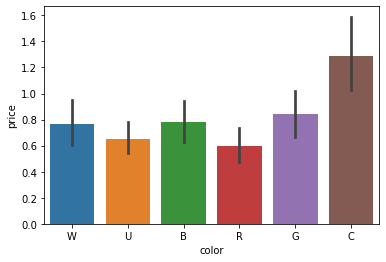

In [9]:
sns.barplot(x=df.color, y = df.price)

Do cards with mana value 5 or greater sell for more than cards with less than mana value 5 on average?

In [10]:
expensive = df[df.manaValue >= 5]
cheap = df[df.manaValue < 5]

print(expensive.price.mean(), "is the average price of cards with mana value 5 or greater")
print(cheap.price.mean(), "is the average price of cards with mana value less than 5")

1.3313501805054084 is the average price of cards with mana value 5 or greater
0.6680925419757987 is the average price of cards with mana value less than 5


Plot each mana value and the average prices of them.

<AxesSubplot:xlabel='manaValue', ylabel='price'>

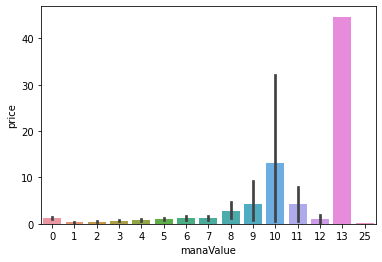

In [11]:
sns.barplot(x=df.manaValue, y = df.price)

Plot each mana value that is less than 8 and the average prices of them.

<AxesSubplot:xlabel='manaValue', ylabel='price'>

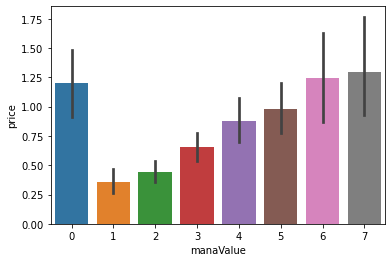

In [12]:
lesseight = df[df.manaValue < 8]
sns.barplot(x=lesseight.manaValue, y = lesseight.price)

What sets have the most sought after cards?

In [13]:

df_set_price = pd.DataFrame(df, columns= ['set', "price"])

df_set_price.sort_values(by=["price"], ascending=False)

,set,price
1699,Battle for Zendikar (BFZ),76.79
5280,Throne of Eldraine (ELD),46.90
2442,Eldritch Moon (EMN),44.70
4020,Rivals of Ixalan (RIX),40.00
3101,Amonkhet (AKH),39.93
...,...,...
5914,Ikoria: Lair of Behemoths (IKO),0.00
4827,Ravnica Allegiance (RNA),0.00
4832,Ravnica Allegiance (RNA),0.00
4833,Ravnica Allegiance (RNA),0.00


Show the prices of each rarity.

<AxesSubplot:xlabel='rarity', ylabel='price'>

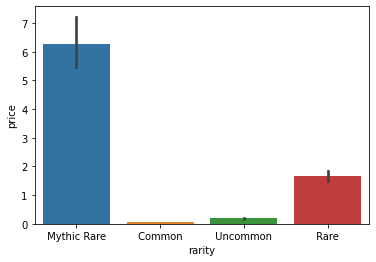

In [14]:
sns.barplot(x=df.rarity, y = df.price)

Show how prices of cards have changed over time.

<AxesSubplot:xlabel='setNum', ylabel='price'>

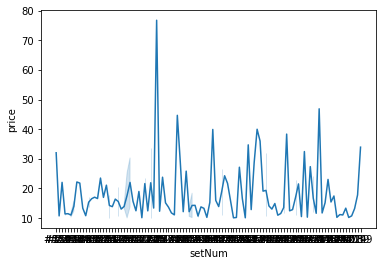

In [15]:
money = df[df.price >= 10]
sns.lineplot(x=money.setNum, y = money.price)

What is the highest priced card? How much is it? What set is it from?

In [16]:
highest = df[df.price == df.price.max()]
highest

,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,colorlessValue,pipValue,manaValue,color
1699,1699,"Ulamog, the Ceaseless Hunger",10,Legendary Creature,Eldrazi,10/10,Battle for Zendikar (BFZ),#15,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,76.79,10,0,10,C
